In [198]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import re
plt.style.use('fivethirtyeight')
%matplotlib inline

In [220]:
import math
from pprint import pprint
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import matplotlib.pyplot as plt

**Untersuchung der Iron March**

1. Aus wievielen CSVs besteht die Datenbank?
2. Wieviele Mitglieder hat die Community?
3. Welcher Mail-Service ist in dieser Community am beliebtesten?
4. Wie alt sind die Mitglieder im Durchschnitt?
5. Wie alt sind die Mitglieder im Durchschnitt bei Anmeldung?
6. Welche Nutzer sind die Ältesten?
7. Welche Nutzer sind die aktivsten?
8. Posten jüngere Nutzer mehr Meldungen als Ältere?
9. Welches sind die beliebtesten Emoticons der Gemeinschaft?
10. Suche das CSV mit den geposteten Meldungen?
11. Stelle dar, wie sich die Schreibwut der Gemeinschaft entwickelt hat.
12. Wende den Vader Sentiment Classifier auf die Meldungen an?
Ressourcen:
https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
https://github.com/apanimesh061/VaderSentimentJava

### 1 Aus wievielen CSVs besteht die Datenbank?

In [115]:
len(os.listdir('csv'))

99

### 2 Wieviele Mitglieder hat die Community

In [116]:
df_core = pd.read_csv("csv/core_members.csv")
df_orig = pd.read_csv("csv/orig_members.csv")
longlist = list(df_core['name']) + list(df_orig['name'])
len(set(longlist))

1632

### 3 Welcher Mail-Service ist in dieser Community am beliebtesten?

In [117]:
def mailsplit(elem):
    return elem.split("@")[1]
df_mail_core = df_core[['name', 'email']].copy() #hier kopiere ich die Spalten, die mich interessieren heraus
df_mail_orig = df_orig[['name', 'email']].copy()
frames = [df_mail_core, df_mail_orig]
mail = pd.concat(frames)
mail = mail.drop_duplicates(subset='name')
mail = mail.reset_index()
del mail['index']
mail['email provider'] = mail['email'].apply(mailsplit)
mail['email provider'].value_counts().head(10)

gmail.com         807
hotmail.com       176
yahoo.com         158
protonmail.com     88
outlook.com        42
tutanota.com       30
live.com           19
hotmail.co.uk      15
yahoo.co.uk        13
aol.com            12
Name: email provider, dtype: int64

### 4 Wie alt sind die Mitglieder im Durchschnitt? (heute, der Leak stammt von Mitte Jahr)

In [141]:
df_alter_orig = df_orig[['name', 'joined', 'bday_year']].copy() #hier kopiere ich die Spalten, die mich interessieren heraus
df_alter_core = df_core[['name', 'joined', 'bday_year']].copy()
frames = [df_alter_orig, df_alter_core]
alter = pd.concat(frames)
alter = alter.dropna()
alter = alter.drop_duplicates(subset='name')
alter['bday_year'] = alter['bday_year'].astype(int)

alter = alter[alter['bday_year']!=0]
int(round((alter['bday_year'].mean() - 2019) * -1))

29

### 5 Wie alt waren die Mitglieder im Durchschnitt bei Anmeldung?

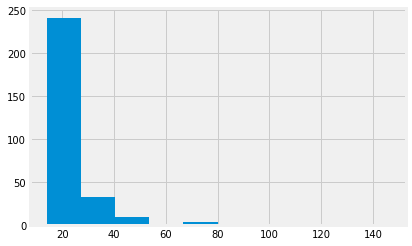

In [142]:
def YEAR(timestamp):
    dt_object = datetime.fromtimestamp(timestamp)
    return dt_object.year
alter['year joined'] = alter['joined'].apply(YEAR)
alter['age joined'] = alter['year joined'] - alter['bday_year']
alter['age joined'].hist() #Wie sind die Werte verteilt.

In [143]:
round(alter[alter['age joined'] < 100]['age joined'].mean())

23.0

### 6 Welche Nutzer sind die Ältesten?

In [147]:
alter.sort_values(by='age joined', ascending=False).head(10)

,name,joined,bday_year,year joined,age joined
923,Tiwaz,1493255733,1871,2017,146
296,Venezuelan Revolutionary,1422497760,1869,2015,146
776,miserablist,1486365853,1911,2017,106
579,Riftbolt,1436321868,1933,2015,82
199,Enrichallwhoinsultylilauta,1352460091,1933,2012,79
304,José Churruca,1424815568,1936,2015,79
308,RammStein,1374297645,1936,2013,77
496,Lost Viking,1423584532,1945,2015,70
930,TexasVet,1493694851,1965,2017,52
298,calvinist-fascist,1371664961,1962,2013,51


### 7 Welche Nutzer sind die aktivsten?

In [153]:
df_core_active = df_core[['name','msg_count_total']].copy()
df_orig_active = df_orig[['name','msg_count_total']].copy()
frames = [df_core_active,df_orig_active ]
active = pd.concat(frames)
active = active.drop_duplicates(subset='name')
active.sort_values(by='msg_count_total', ascending=False).head(10)

,name,msg_count_total
156,Bozovski,58
235,Odin,56
1,Kacen,52
182,Raycis,52
5,Daddy Terror,52
1,PhalNat,52
306,Fidena,52
79,Clive Bissel,51
225,Bear,51
334,HermannTheGerman,51


### 8 Posten jüngere Nutzer mehr Meldungen als Ältere?

In [154]:
#Hier merge ich das alters df mit den zu den Anzahl Meldungen 
act_age = active.merge(alter, left_on='name', right_on='name')

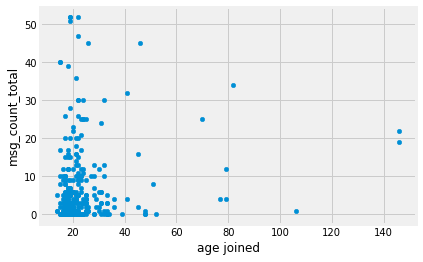

In [158]:
act_age.plot(kind='scatter', x='age joined', y='msg_count_total')

### 9 Welches sind die beliebtesten Emoticons der Gemeinschaft?

In [162]:
df_emo = pd.read_csv('csv/core_emoticons.csv')

In [171]:
df_emo.sort_values(['emo_set_position', 'emo_position'], ascending=[True, True]).head() #Nach zwei Kolonnen sortieren. Hier zuerst nach der
                                             #Emo-Set-Position und dann der Position des Emoticons 
                                             #in diesem Set. Unklar bleibt allerdings, ob hier die 
                                             #Beliebtheit ausgedrückt ist, oder es lediglich die
                                             #Position ist.


,id,typed,image,clickable,emo_set,emo_position,emo_set_position,image_2x,width,height
67,164,:crest:,emoticons/crest.png,1,ebad4264c1c40dd74f6fd2479414fbaa,1,1,NaN,0,0
75,172,:skellyM:,emoticons/skellyM.png,1,ebad4264c1c40dd74f6fd2479414fbaa,2,1,NaN,0,0
71,168,:IMMH:,emoticons/IMMH.png,1,ebad4264c1c40dd74f6fd2479414fbaa,3,1,NaN,0,0
73,170,:pride:,emoticons/pride.png,1,ebad4264c1c40dd74f6fd2479414fbaa,4,1,NaN,0,0
64,161,:alma:,emoticons/alma.png,1,ebad4264c1c40dd74f6fd2479414fbaa,5,1,NaN,0,0


Um die beliebtesten Emoticons zu finden, muss wohl der Text danach abgesucht werden. 

### 10 Suche das CSV mit den geposteten Meldungen?

In [194]:
df = pd.read_csv('csv/core_message_posts.csv')
pd.set_option('max_colwidth', 4000)
df['msg_post'].head(50) #Eine Durchsicht der ersten 50 Meldungen zeigt, dass Emoticons im Text
                        #entweder nicht benutzt sind, oder hier nicht gespeichert werden. 

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        <p>The best first post to make on our forums is the one where you introduce yourself to the community. Check the Introductions 

### 11 Stelle dar, wie sich die Schreibwut der Gemeinschaft entwickelt hat?

In [197]:
#ZUerst das Datu bestimmen
def YEAR(timestamp):
    dt_object = datetime.fromtimestamp(timestamp)
    return dt_object
#Und jetzt mache ich aus dem Datum den Index
df.index = df['msg_date'].apply(YEAR)

In [204]:
#Nun will ich die Anzahl Charaktere pro Meldung zählen.
def counting(elem):
    elem = elem.replace("</p>","").replace("\n","")
    elem = elem.replace("\t","")
    try:
        pattern = re.match('href.*', elem).group()
        elem = elem.replace(pattern,"")
        return len(elem)
    except:
        return len(elem)
df['msg_post_length'] = df['msg_post'].apply(counting)

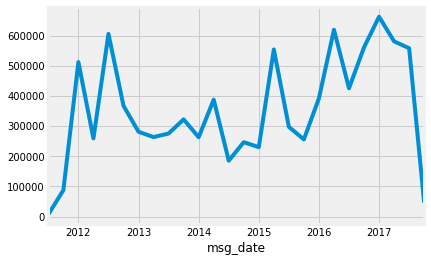

In [209]:
df.resample('Q')['msg_post_length'].sum().plot()

In [221]:
df

,msg_id,msg_topic_id,msg_date,msg_post,msg_post_key,msg_author_id,msg_ip_address,msg_is_first_post,msg_post_length
msg_date,,,,,,,,,
2011-09-16 05:49:58,1,1,1316144998,<p>The best first post to make on our forums is the one where you introduce yourself to the community. Check the Introductions forum to do this.</p>,3320f7f06c422ef0fb77342724b4fd24,1,178.140.119.217,1,144
2011-09-16 13:54:08,2,2,1316174048,"\n<p>Who are we hosting this forum from?</p>\n<p>I like it a lot, it feels very fluid and the software is very good.</p>\n",9204e4883321af2275a37138d054a3f1,11,109.78.212.13,1,108
2011-09-16 16:39:59,3,2,1316183999,"<p>Crisis Host - they basically provide hosting for free speech projects, ergo why they were fine with hosting fascists. And the forum platform I bought from Invision Powe Boards and then installed it myself to the site.</p>",12fd0309239711d02b39127de3502c51,1,178.140.119.217,0,220
2011-09-16 17:29:01,4,2,1316186941,"<p>Thank you, I'll make a note of it, I am very impressed by this style of forum, very impressed.</p>",0658c6f99ac18d90609ea074ae5eefe6,11,109.78.212.13,0,97
2011-09-16 17:32:58,5,2,1316187178,"<p>If you mean the dark+orange skin then that's a skin I also had to purchase. But if you mean the functionality and etc, then yeah, that's IPB 3.2.2</p>",570257864e3cb812eebc2de5e5919080,1,178.140.119.217,0,149
...,...,...,...,...,...,...,...,...,...
2017-11-20 22:30:41,26558,5795,1511213441,"\n<p>\n\tOf course I know the Akbaria, it's a sufi group, one of the most important. When I went to Syria; I visited the ""maquam"" of Ibn Arabi. But I coudln't help you unfortunately my friend.\n</p>\n\n<p>\n\tI hope you will have all good energy to win in your life. (and one day, If you want to go in Algeria, tell me)\n</p>\n\n<p>\n\tKind regards\n</p>\n\n<p>\n\t \n</p>\n\n<p>\n\tSH!\n</p>\n",0,13298,141.101.104.54,0,324
2017-11-21 00:28:09,26559,5975,1511220489,"\n<p>\n\t<a href=""https://scottishnationalistsociety.wordpress.com/"" rel=""external nofollow"">https://scottishnationalistsociety.wordpress.com/</a>\n</p>\n\n<p>\n\t \n</p>\n\n<p>\n\twelcome to Ironmarch, 88\n</p>\n",0,9792,141.101.107.205,1,171
2017-11-21 01:08:15,26560,5743,1511222895,"\n<p>\n\tВидя ли се в The Independent? :D\n</p>\n\n<p>\n\t \n</p>\n\n<p>\n\t<a href=""http://www.independent.co.uk/news/world/americas/charles-manson-death-dead-serial-killer-neo-nazis-resurrect-fascist-movement-cult-family-universal-a8065781.html"" rel=""external nofollow"">http://www.independent.co.uk/news/world/americas/charles-manson-death-dead-serial-killer-neo-nazis-resurrect-fascist-movement-cult-family-universal-a8065781.html</a>\n</p>\n",0,14702,162.158.34.41,0,403


### Wende den Vader Sentiment Classifier auf die Meldungen an?

In [222]:
sia = SIA()
results = []

for line in list(df['msg_post']):
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)
pd.set_option('max_colwidth', 320)
df_sent = pd.DataFrame(results)
df_sent = df_sent.sort_values(by='compound').reset_index()
del df_sent['index']
df_sent = df_sent.drop_duplicates()

In [225]:
df_sent.sort_values(by='compound')

,neg,neu,pos,compound,headline
0,0.116,0.829,0.055,-0.9999,"\n<p>\n\tCorrection, Ernst Niekisch.\n</p>\n\n<p>\n\tThere is the worst parts of chapter one\n</p>\n\n<p>\n\t<br />\n\tPág 5: <br />\n\tIn German.<br />\n\t''Wer die Welt beherrschen will, kann nicht in der Bindung einer »Scholle« ruhen. Der Imperator muß über allen Dingen, über die er gebietet, muß auch über dem A..."
1,0.113,0.841,0.045,-0.9998,"\n<p>\n\t Is a book, that i'm translating for Iron March... it was wrotted by Ernst Niekisch in German, is about European History and Politics. Its pretty long, but right know i just need to translate just some awfull Parts. It is not that long, its just that I put the parts in english to help you to make it easie..."
2,0.202,0.679,0.118,-0.9985,"\n<p><a href=""<___base_url___>/index.php?/topic/243-posters-central/?p=81363"" rel="""">http://ironmarch.org/index.php?/topic/243-posters-central/?p=81363</a></p>\n<p> </p>\n<p>Here are some of their posters.</p>\n<p> </p>\n<p>After the war they were handed over to Yugo commies by the British and commies brutally mass..."
3,0.155,0.757,0.088,-0.9985,"\n<p>\n\tHere's the conversation we had which should settle this nonsense, it's basically an issue of communicating the point:\n</p>\n\n<p>\n\tZmaj: <span style=""font-family:Whitney, 'Helvetica Neue', Helvetica, Arial, sans-serif;font-size:15px;font-style:normal;font-weight:normal;letter-spacing:normal;line-height:..."
4,0.171,0.773,0.056,-0.9985,"\n<blockquote class=""ipsQuote"" data-ipsquote="""" data-ipsquote-contentapp=""core"" data-ipsquote-contentclass=""core_Messenger_Conversation"" data-ipsquote-contentcommentid=""25334"" data-ipsquote-contentid=""5697"" data-ipsquote-contenttype=""messaging"" data-ipsquote-timestamp=""1499489161"" data-ipsquote-userid=""14105"" data-..."
...,...,...,...,...,...
21709,0.063,0.826,0.111,0.9998,"\n<p>\n\tWew lad… between the Christmas holiday, and school preparation, and work-related issues, I had almost zero time I could spend on IronMarch. I hope you understand. But, now I'm back again. And in response to your kind Christmas wish, I guess I could say:\n</p>\n\n<p>\n\t \n</p>\n\n<p style=""text-align:cente..."
21712,0.059,0.823,0.118,0.9999,\n<p>[2012-02-25 19:24:08] [iNFO] Now logging to &lt;file:///home/william/.mozilla/firefox/lr0rxq3q.default/chatzilla/logs/irc.foonetic.net/channels/%23AmericanFascism.2012-02-25.log&gt;.</p>\n<p>[2012-02-25 19:24:11] &lt;ProPatriaMori[iM]&gt; Sounds about right to me.</p>\n<p>[2012-02-25 19:24:30] &lt;Elegos_[iM]&...
21713,0.060,0.821,0.119,0.9999,"\n<blockquote class=""ipsQuote"" data-ipsquote="""" data-ipsquote-contentapp=""core"" data-ipsquote-contentclass=""core_Messenger_Conversation"" data-ipsquote-contentcommentid=""21964"" data-ipsquote-contentid=""5123"" data-ipsquote-contenttype=""messaging"" data-ipsquote-timestamp=""1484542385"" data-ipsquote-userid=""13461"" data-..."
21711,0.086,0.796,0.119,0.9999,"\n<p>\n\tMan, I hope you can pardon this extremely long delay. I really do apologize.\n</p>\n\n<p>\n\tThe delay wasn’t without reason though. To be honest, I almost tried thinking of some excuses as to why it took so long, but eventually I decided to just be straight-up frank with you about it: basically, the total..."


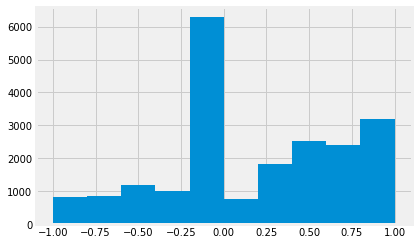

In [226]:
#Erstaunlicherweise sind die meiten Meldungen, die grosse Merheit, positiv. 
#Viele fallen in die Kategorie leicht negativ. GAnz eindeutig negativ sind nur
#rund 2000, also 10 Pozent. Als nächstes in die Meldungen reingehen, um die 
#Kategorisierung zu verstehen. 
df_sent['compound'].hist()